## 1.Generate 50 2D-data points using the following function: y = sin(x^2 + 1)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.linalg import pinv 

# Defining the function
def f(x):
    return (np.sin(x**2 + 1))

# Generating 50 data points
x = np.arange(0, 1, 0.02)
x = np.array(x)
y = f(x)

#Setting up matplotlib
def setup_plot(title):
    %matplotlib inline
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title, fontsize=15)

## 2. Add Gaussian random noise to the data

In [2]:
noise = np.random.normal(0, 0.02,50)
gauss_y = y + noise    

## 3. Show the original curve line and the noisy data.

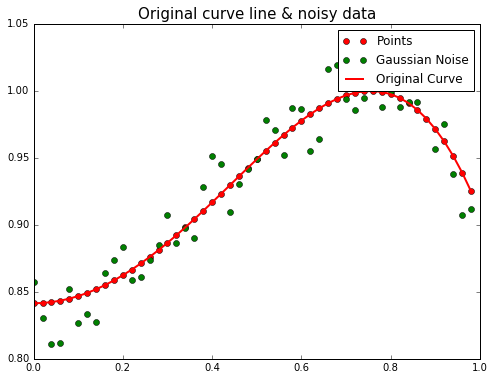

In [3]:
# Plotting the data
def plot_data(x, y, noisy):
    setup_plot("Original curve line & noisy data")
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, noisy, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    plt.legend()
    plt.show()
plot_data(x, y, gauss_y)

## 4. Compute the Gaussian process prediction of every input data sequentially, where each input data is taken randomly from the noise data.

In [4]:
def calculate_phi(x, typ, M):
    N = len(x)
    phi = np.zeros([N, M])
    
    if (typ=="gaussian"):
        for n in range(0, N): 
            s = 0.25    # standard deviation
            u = 0       # mean
            for m in range(0, M):
                phi[n][m] = np.exp(-np.power(x[n] - u, 2)/(2*s*s))
                u += s
    
    return phi

def calculate_cov_prior(alpha, phi):
    return ((1 / alpha) * phi.dot(phi.transpose()))

def calculate_cov_likelihood(beta, cov_prior):
    return (1 / beta + cov_prior)

# phi = calculate_phi(x, "gaussian", 5)
# cov_prior = calculate_cov_prior(1e-4, phi)
# cov_likelihood = calculate_cov_likelihood(2e-2, cov_prior)
# print(cov_likelihood.shape)

In [43]:
class Kernel(object):
    def __init__(self, *args):
        self.thetas = args
    
    def __call__(self, x, y):
        exp = self.thetas[0] * np.exp( -0.5 * self.thetas[1] * (( x - y ) **2) )
        linear = self.thetas[3] * (x * y)
        constant = self.thetas[2]
        return (exp + constant + linear)

In [44]:
# x_rand is the new point that we are drew
# x is the list of x_rands we have drawn up until now
def calculate_k(x, x_new, kernel):
    N = len(x)
    k = np.zeros((N, 1))
    for n in range(N):
        k[n] = kernel(x[n], x_new)
    return k

def calculate_m_star(k, cov, y_noise):
    cov_inv = pinv(cov)
    return (k.transpose().dot(cov_inv).dot(y_noise))

def calculate_c_star(kernel, beta, x_rand):
    beta_inv = 1 / beta
    return (kernel(x_rand, x_rand) + beta_inv)

def calculate_s_star(c_star, k, cov):
    cov_inv = pinv(cov)
    return (c_star - k.transpose().dot(cov_inv).dot(k))

def calculate_cov_star(cov, k, c_star):
    c_star = np.asmatrix(c_star)
    cov = np.hstack((cov, k))
    bottom = np.hstack((k.transpose(),c_star))
    cov = np.vstack((cov, bottom))
    return cov

In [45]:
def plot(x, y, gauss_y, y_est, y_err):
    plt.show()
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, gauss_y, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y,label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    plt.scatter(x, y_est, label = "Estimated Curve")
    plt.errorbar(x, y_est, y_err, ecolor="blue")
    
# for each random x that we draw
def plot_graphs(alpha, beta, x, y, gauss_y, M, kernel):
    # comes up with a random list of x-es to choose from
    x_rand = random.sample(list(enumerate(x)), len(x))
    x_trained = []
    y_trained = []

    for j in range(len(x)):
        print("Iter: %s" % j)
        y_est = []
        y_err = []
    
        # get my first random x
        x_index = x_rand[j][0]
        x_new = x_rand[j][1]

        c_star = calculate_c_star(kernel, beta, x_new)
        if (j==0):
            cov = np.asmatrix(c_star)
        else:
            k = calculate_k(x_trained, x_new, kernel)
            cov = calculate_cov_star(cov, k, c_star)
            
        x_trained.append(x_new)
        y_trained.append(gauss_y[x_index])

        # now calculate m star and sigma star
        for i in range(len(x)):
            c_star = calculate_c_star(kernel, beta, x[i])
            k = calculate_k(x_trained, x[i], kernel)
            m_star = calculate_m_star(k, cov, y_trained)
            s_star = calculate_s_star(c_star, k, cov)
            
            y_est.append(m_star.tolist()[0][0])
            y_err.append(s_star.tolist()[0][0])
        
        plot(x, y, gauss_y, y_est, y_err)


## 5. Use the kernel we discuss in class (textbook's Eq. (6.63), page 307), by setting thetas: (1.0, 4.0, 0.0, 0.0)

In [47]:
kernel = Kernel(1.0, 4.0, 0.0, 0.0)

## Too Low Beta -> Uncertainty is too high to discern any fitting

Iter: 0
Iter: 1


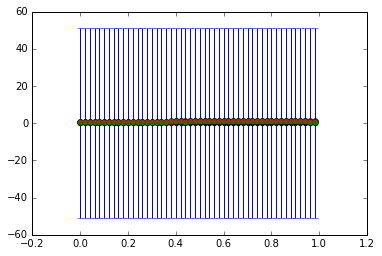

Iter: 2


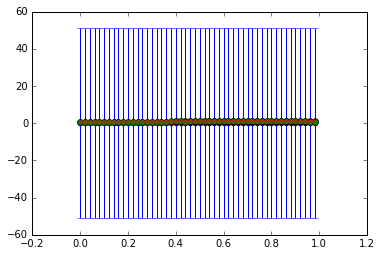

Iter: 3


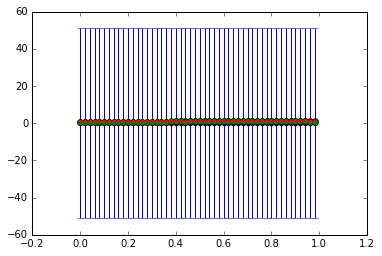

Iter: 4


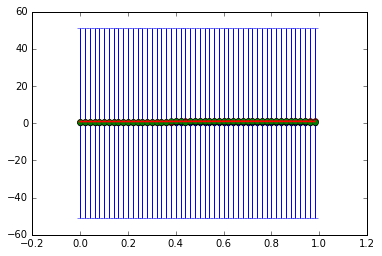

Iter: 5


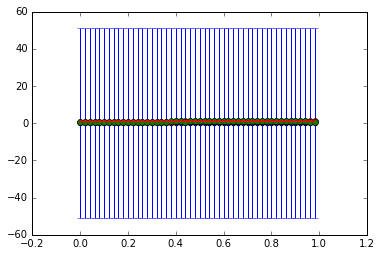

Iter: 6


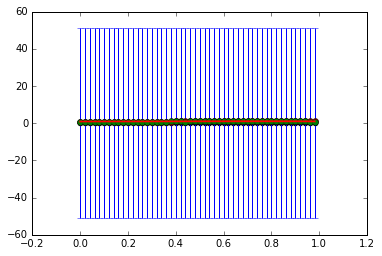

Iter: 7


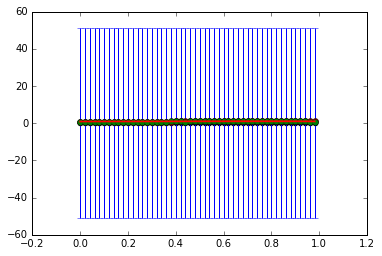

Iter: 8


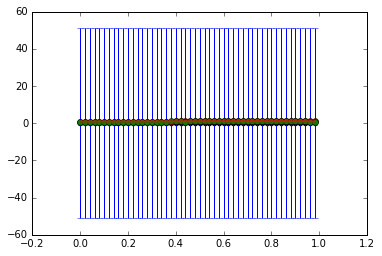

Iter: 9


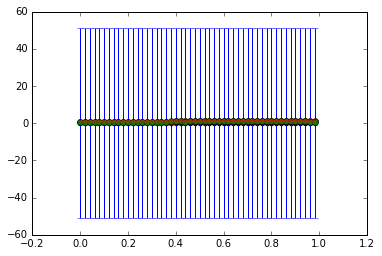

Iter: 10


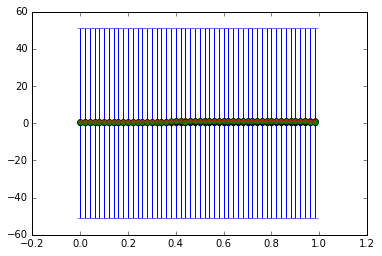

Iter: 11


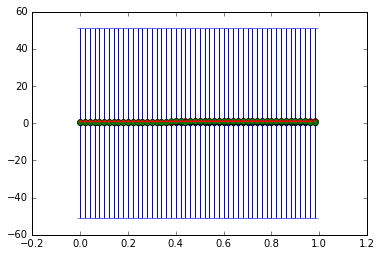

Iter: 12


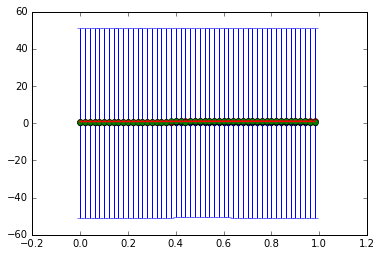

Iter: 13


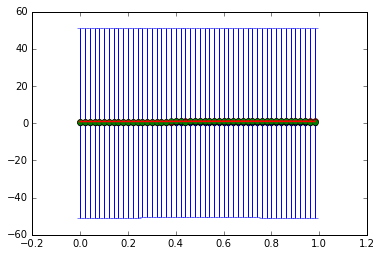

Iter: 14


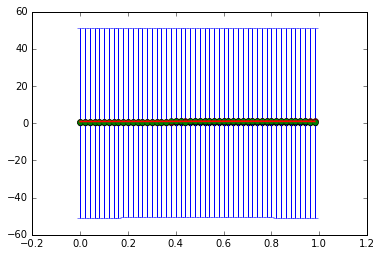

Iter: 15


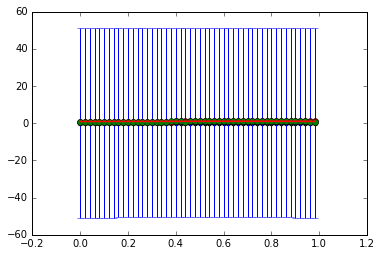

Iter: 16


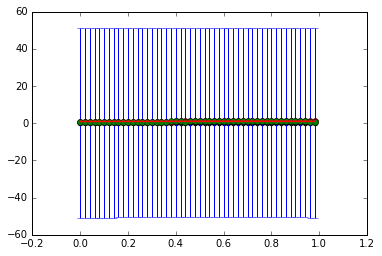

Iter: 17


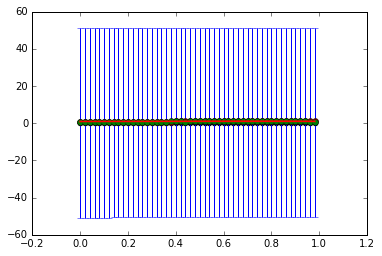

Iter: 18


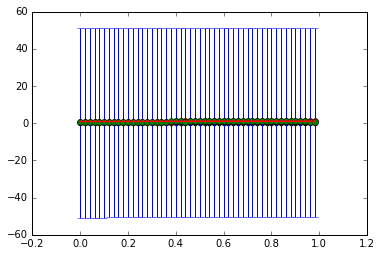

Iter: 19


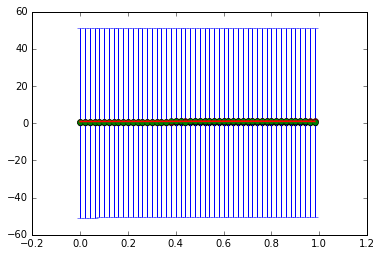

Iter: 20


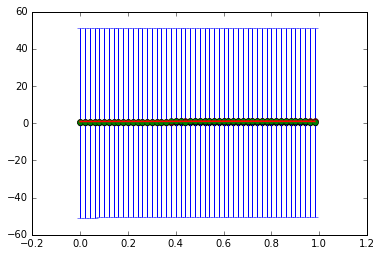

Iter: 21


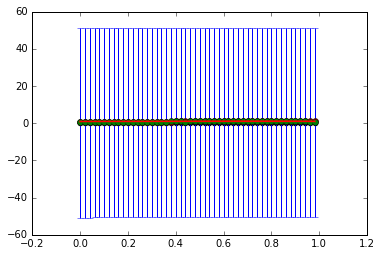

Iter: 22


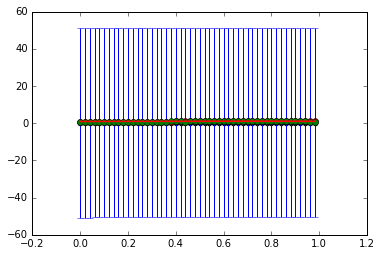

Iter: 23


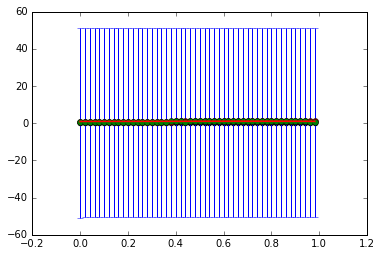

Iter: 24


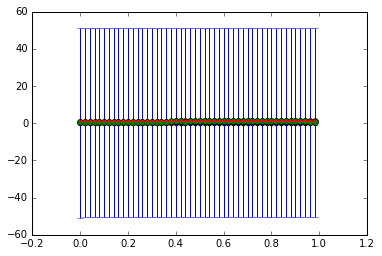

Iter: 25


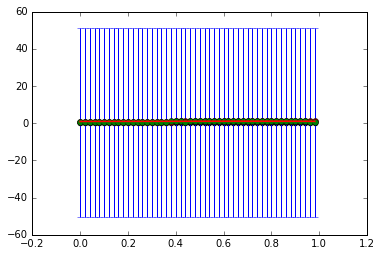

Iter: 26


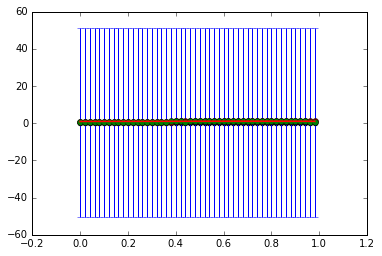

Iter: 27


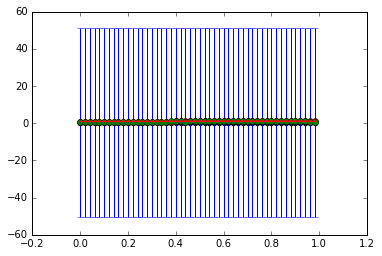

Iter: 28


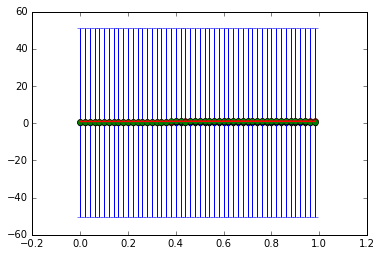

Iter: 29


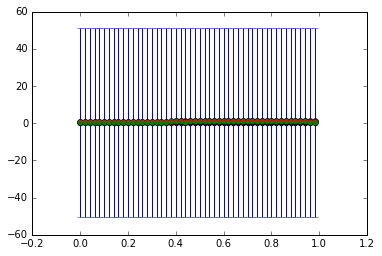

Iter: 30


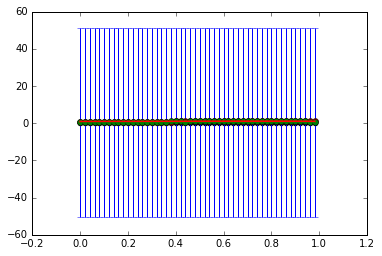

Iter: 31


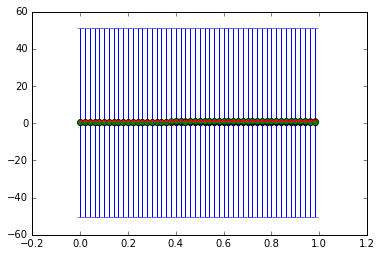

Iter: 32


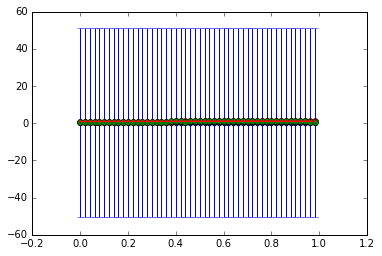

Iter: 33


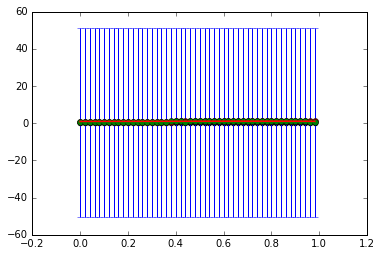

Iter: 34


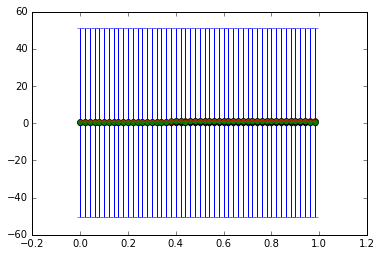

Iter: 35


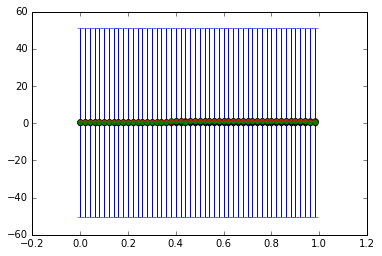

Iter: 36


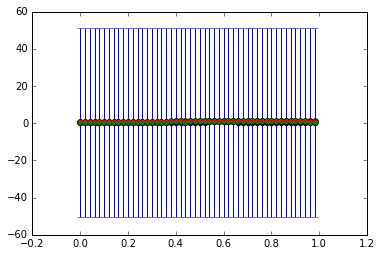

Iter: 37


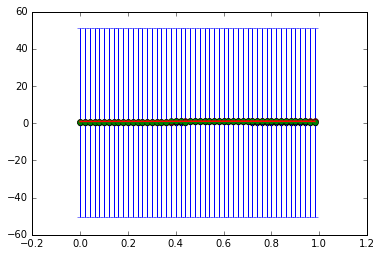

Iter: 38


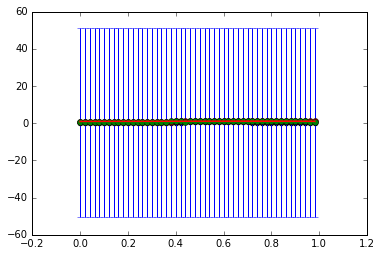

Iter: 39


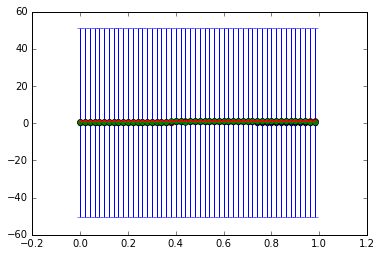

Iter: 40


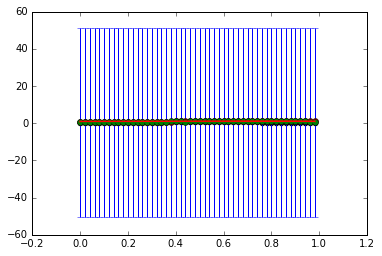

Iter: 41


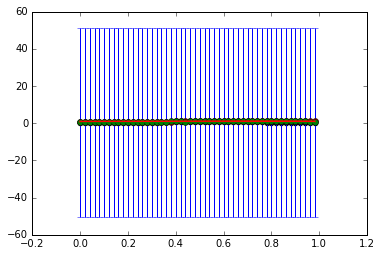

Iter: 42


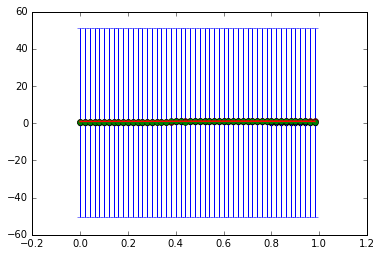

Iter: 43


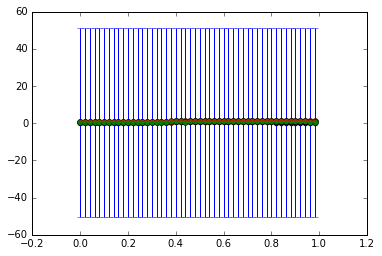

Iter: 44


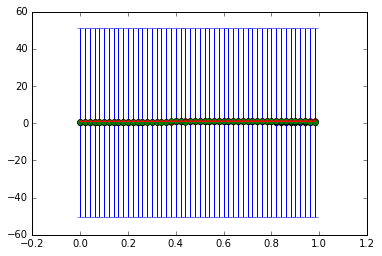

Iter: 45


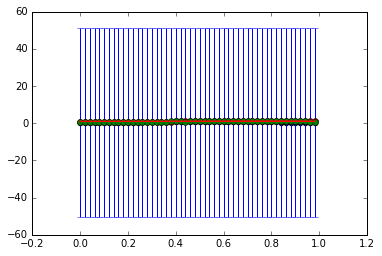

Iter: 46


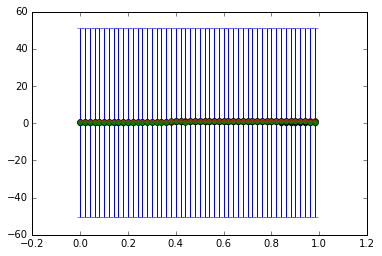

Iter: 47


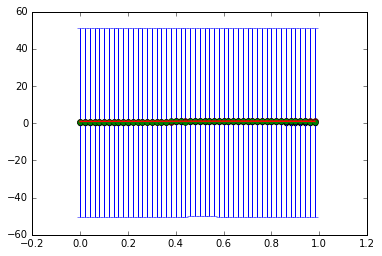

Iter: 48


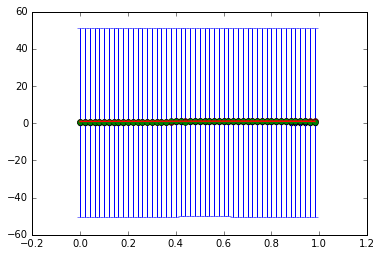

Iter: 49


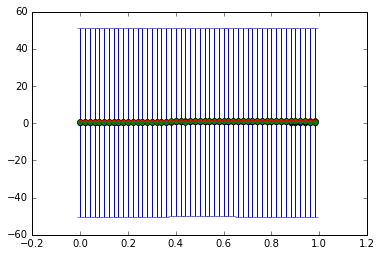

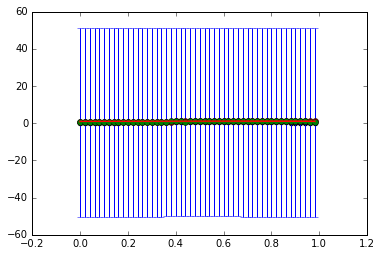

In [48]:
# arguments -> alpha, beta, x, y, gauss_y, M, kernel
plot_graphs(1e-4, 0.02, x, y, gauss_y, 5, kernel)

## Low Beta -> Fitting is more discernible but error bars still too high

Iter: 0
Iter: 1


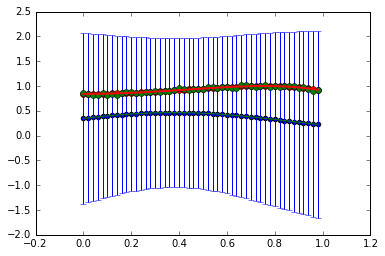

Iter: 2


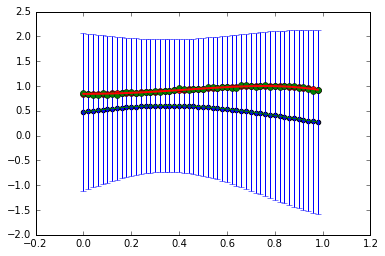

Iter: 3


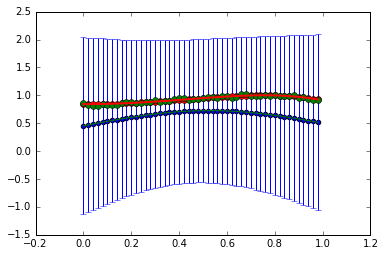

Iter: 4


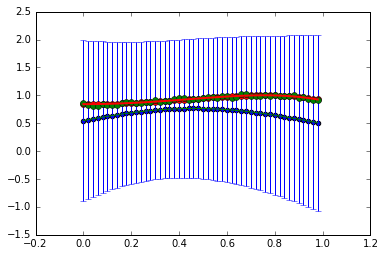

Iter: 5


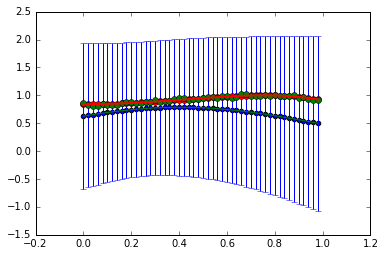

Iter: 6


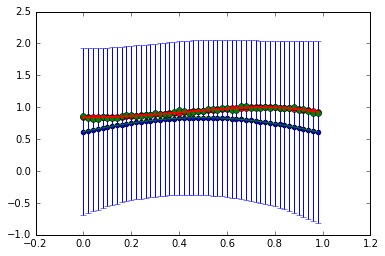

Iter: 7


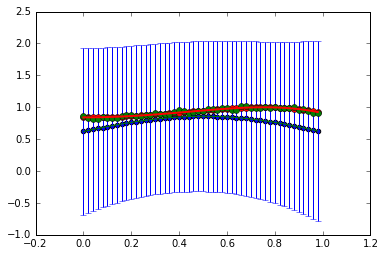

Iter: 8


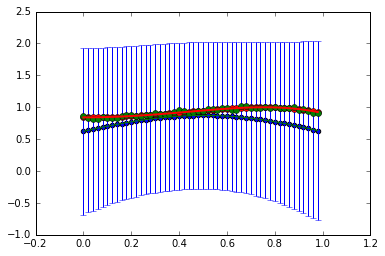

Iter: 9


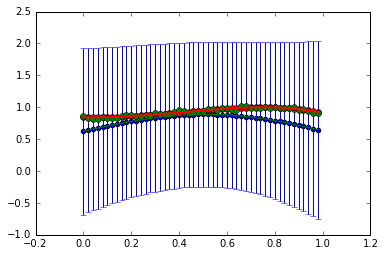

Iter: 10


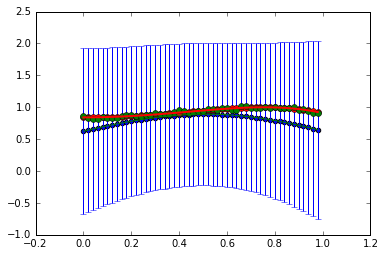

Iter: 11


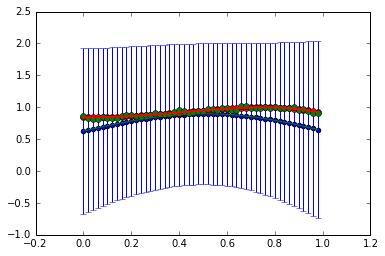

Iter: 12


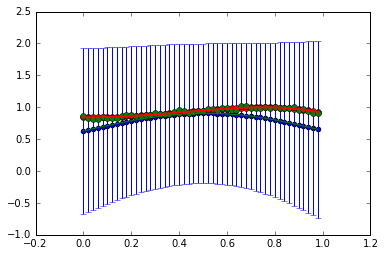

Iter: 13


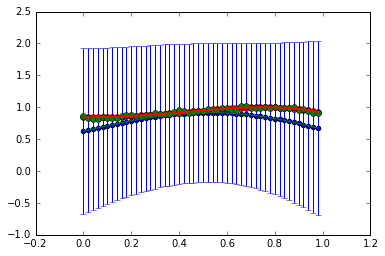

Iter: 14


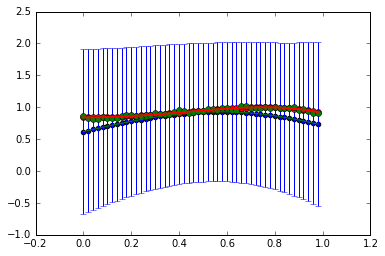

Iter: 15


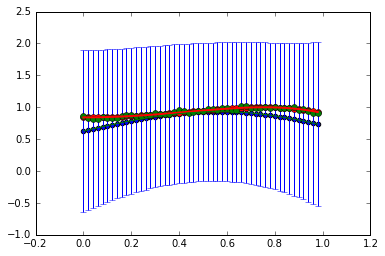

Iter: 16


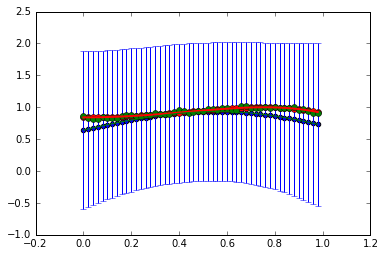

Iter: 17


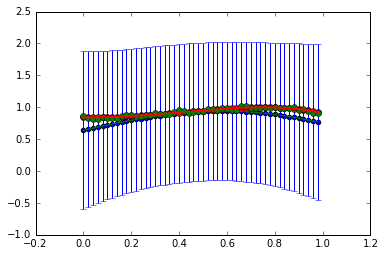

Iter: 18


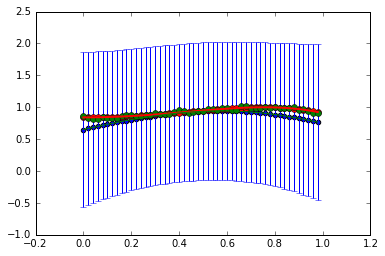

Iter: 19


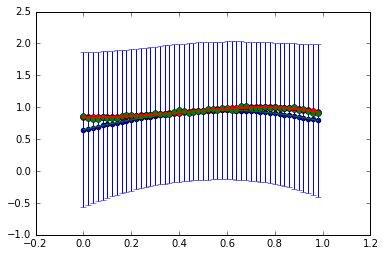

Iter: 20


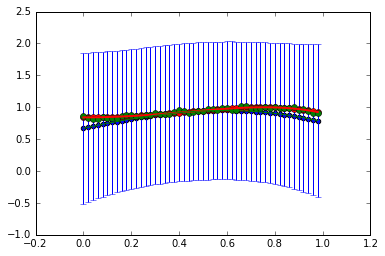

Iter: 21


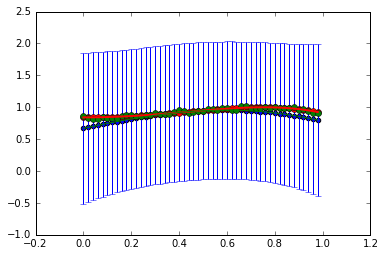

Iter: 22


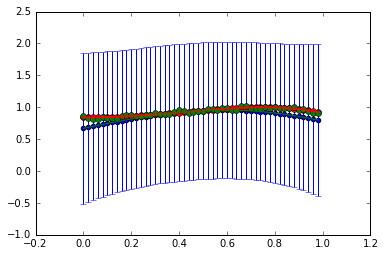

Iter: 23


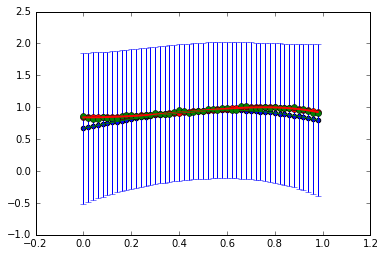

Iter: 24


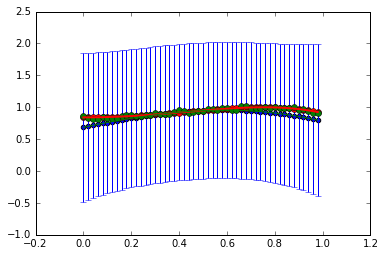

Iter: 25


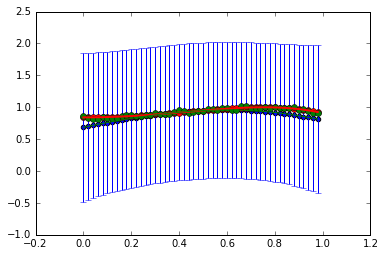

Iter: 26


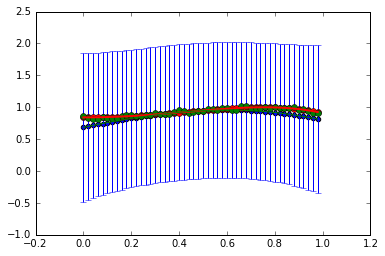

Iter: 27


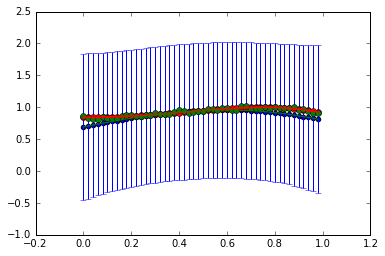

Iter: 28


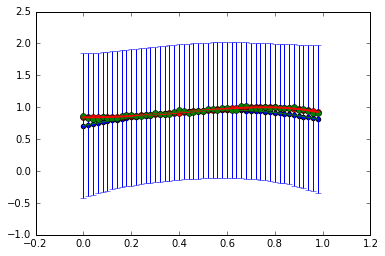

Iter: 29


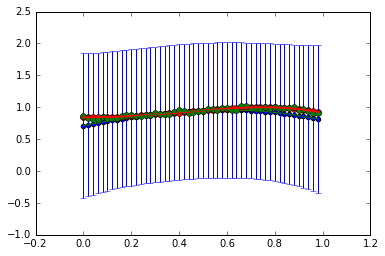

Iter: 30


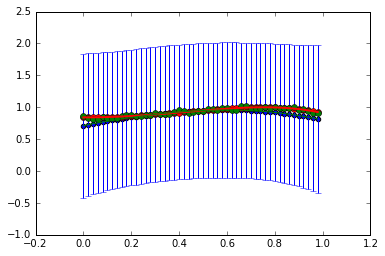

Iter: 31


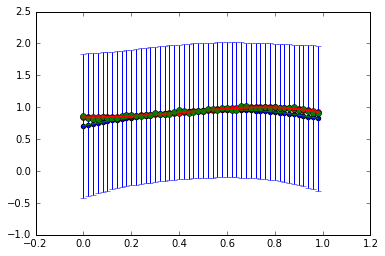

Iter: 32


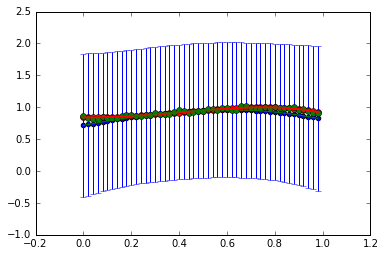

Iter: 33


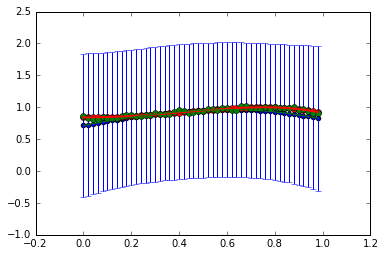

Iter: 34


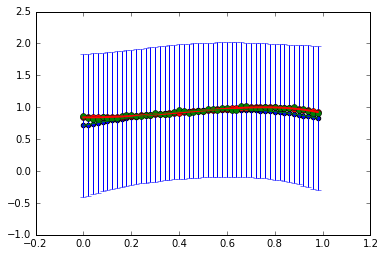

Iter: 35


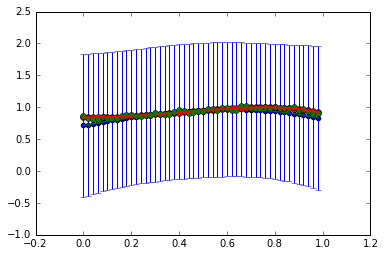

Iter: 36


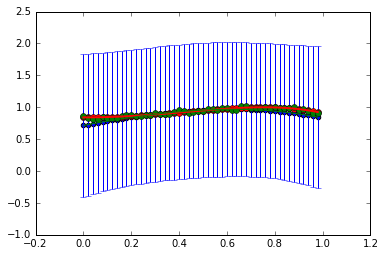

Iter: 37


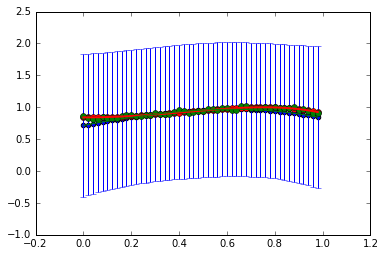

Iter: 38


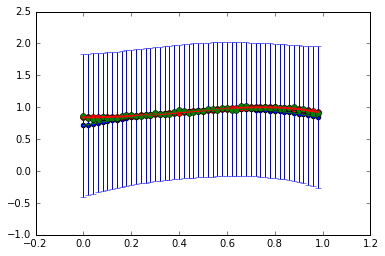

Iter: 39


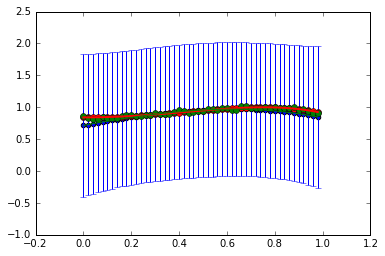

Iter: 40


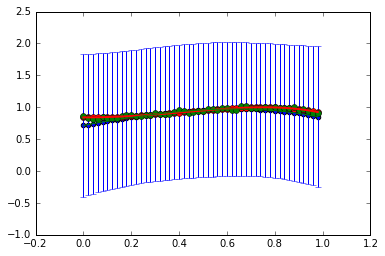

Iter: 41


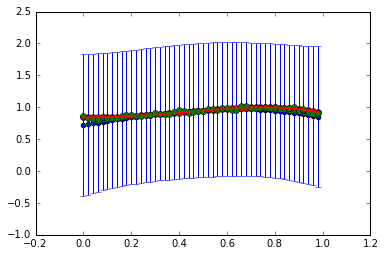

Iter: 42


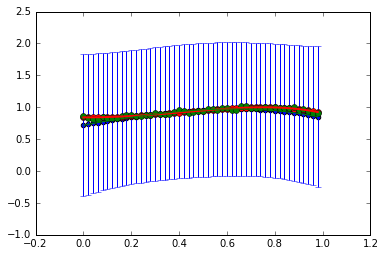

Iter: 43


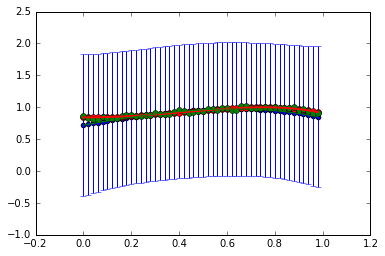

Iter: 44


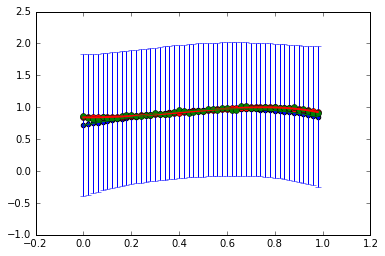

Iter: 45


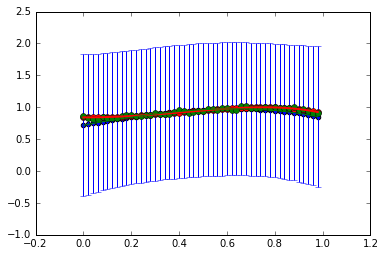

Iter: 46


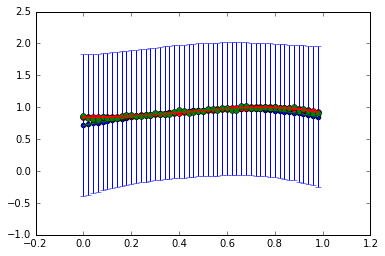

Iter: 47


Iter: 48


Iter: 49


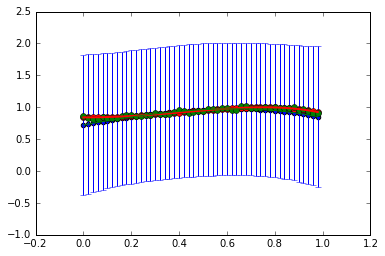

In [46]:
plot_graphs(1e-4, 1.0, x, y, gauss_y, 5, kernel)

## High Beta -> Fitting is good

Iter: 0
Iter: 1


Iter: 2


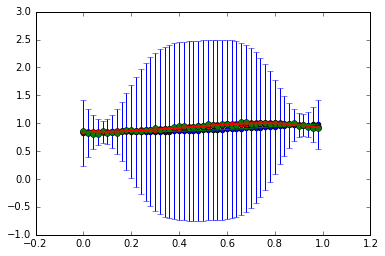

Iter: 3


Iter: 4


Iter: 5


Iter: 6


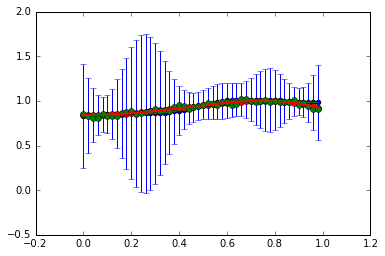

Iter: 7


Iter: 8


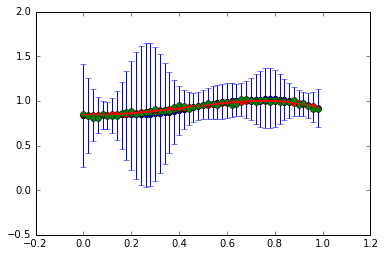

Iter: 9


Iter: 10


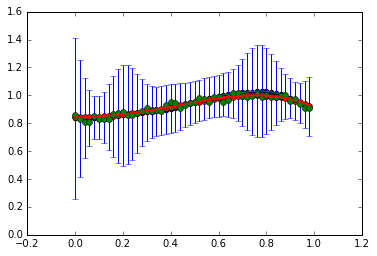

Iter: 11


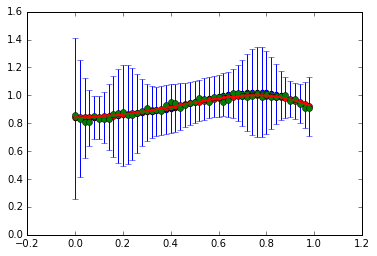

Iter: 12


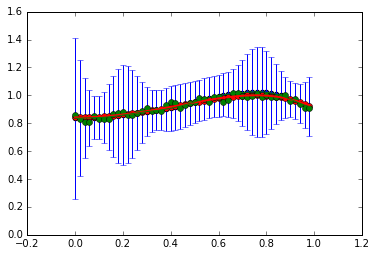

Iter: 13


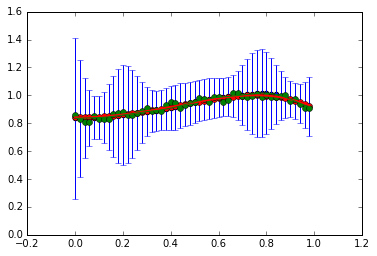

Iter: 14


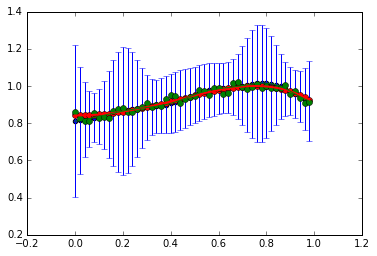

Iter: 15


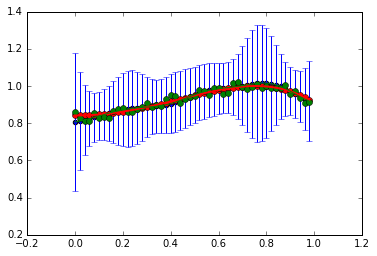

Iter: 16


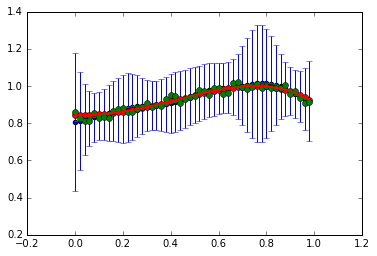

Iter: 17


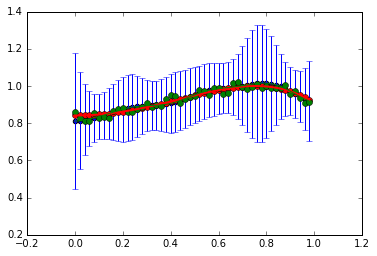

Iter: 18


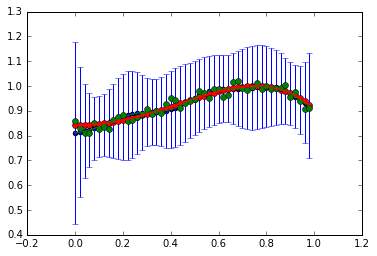

Iter: 19


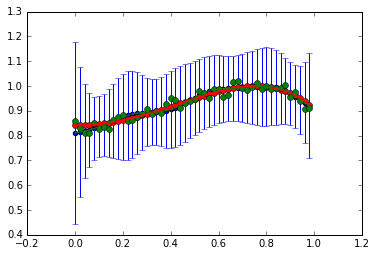

Iter: 20


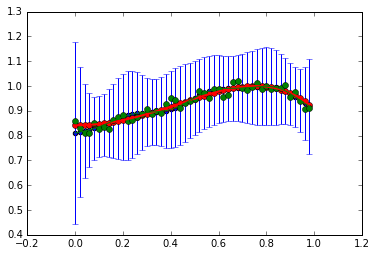

Iter: 21


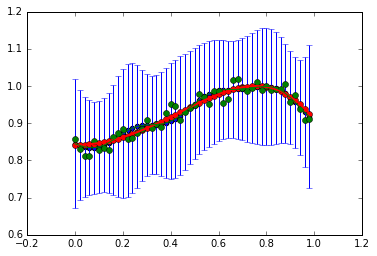

Iter: 22


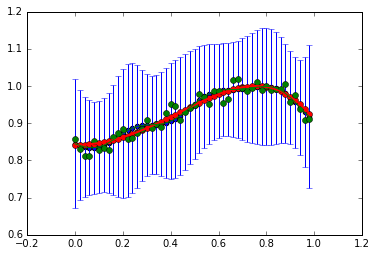

Iter: 23


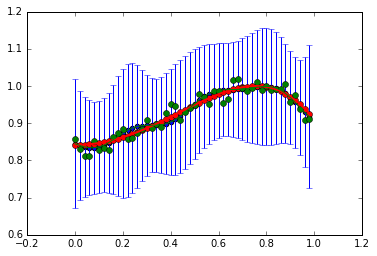

Iter: 24


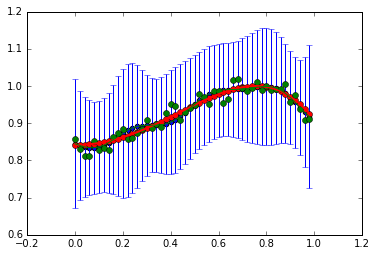

Iter: 25


Iter: 26


Iter: 27


Iter: 28


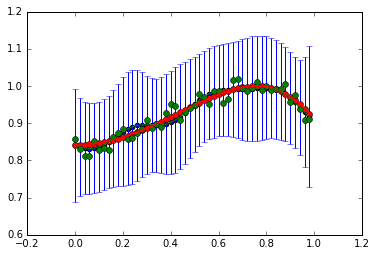

Iter: 29


Iter: 30


Iter: 31


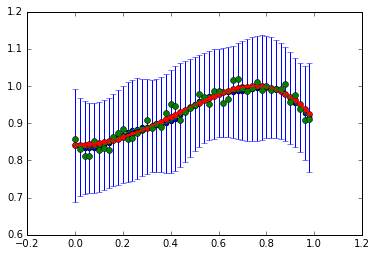

Iter: 32


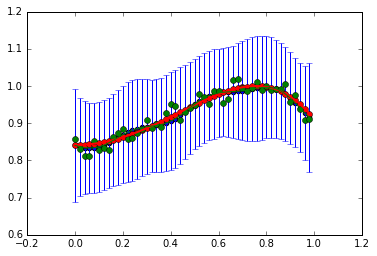

Iter: 33


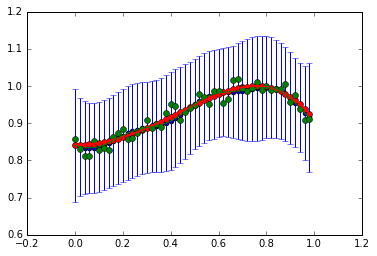

Iter: 34


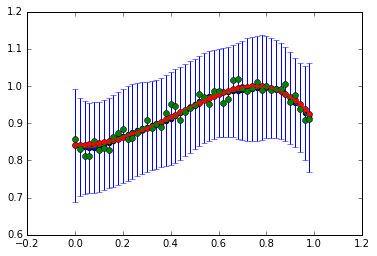

Iter: 35


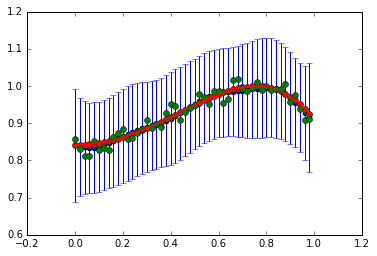

Iter: 36


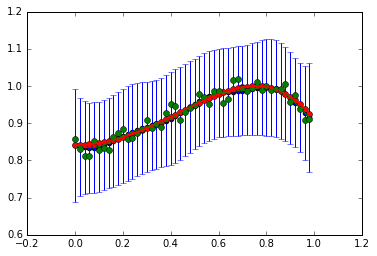

Iter: 37


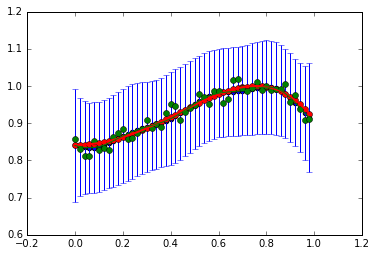

Iter: 38


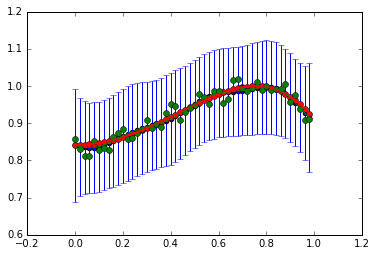

Iter: 39


Iter: 40


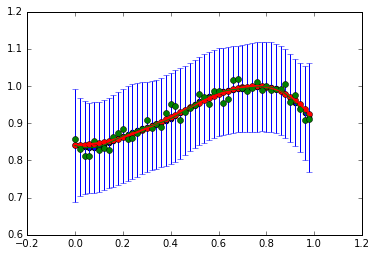

Iter: 41


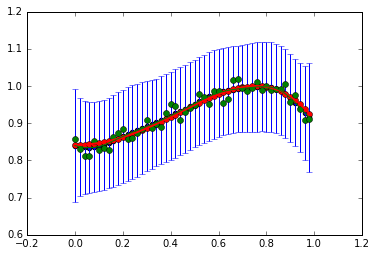

Iter: 42


Iter: 43


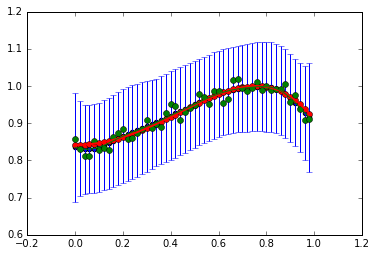

Iter: 44


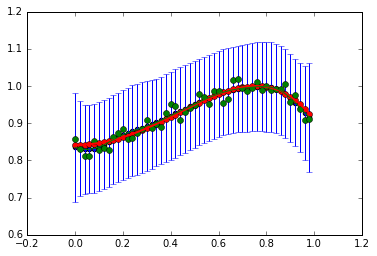

Iter: 45


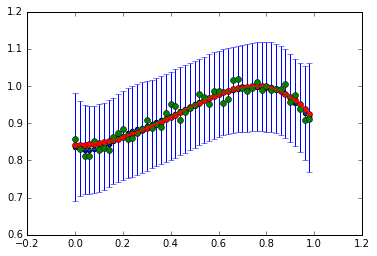

Iter: 46


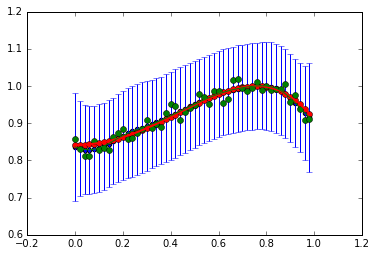

Iter: 47


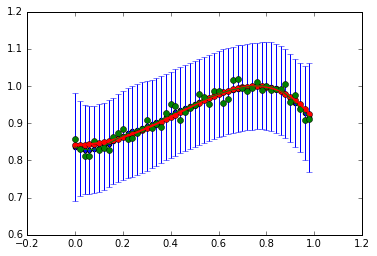

Iter: 48


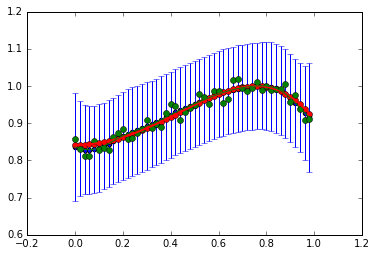

Iter: 49


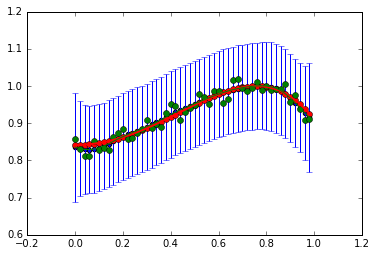

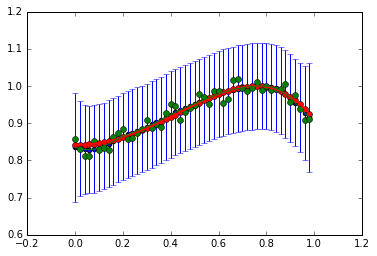

In [40]:
plot_graphs(1e-4, 10.0, x, y, gauss_y, 5, kernel)

## Too High Beta -> Fitting is good but the tail end is a bit off

Iter: 0
Iter: 1


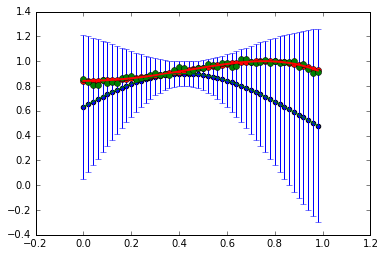

Iter: 2


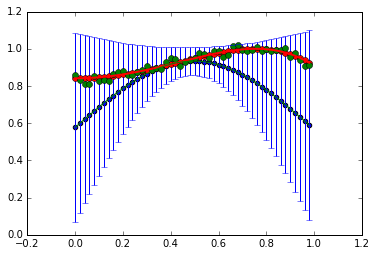

Iter: 3


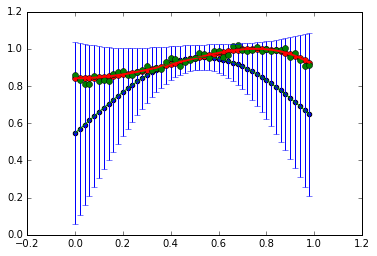

Iter: 4


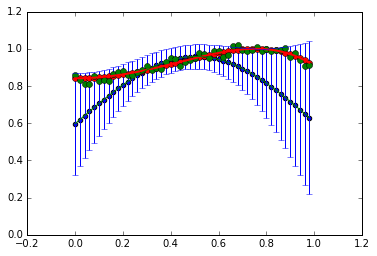

Iter: 5


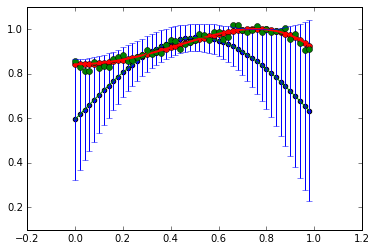

Iter: 6


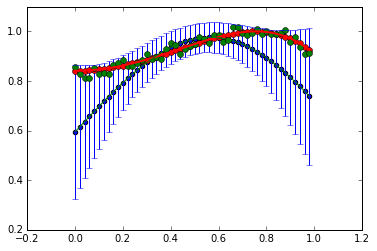

Iter: 7


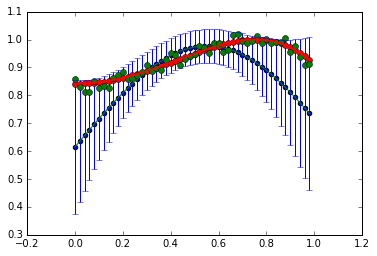

Iter: 8


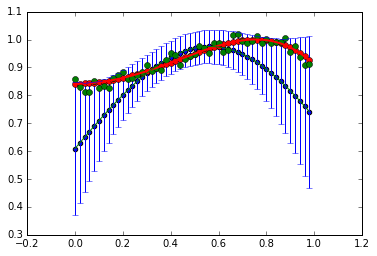

Iter: 9


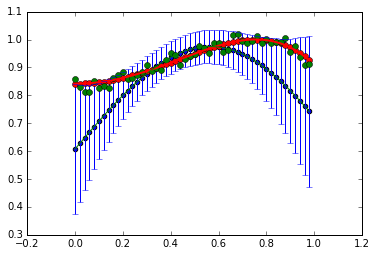

Iter: 10


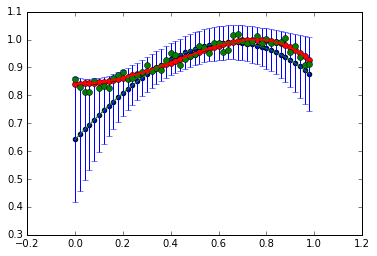

Iter: 11


Iter: 12


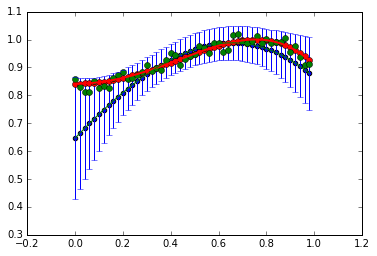

Iter: 13


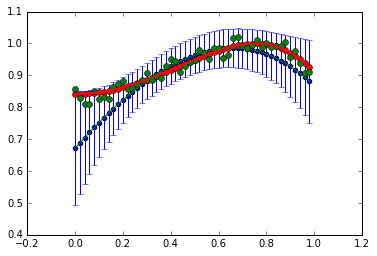

Iter: 14


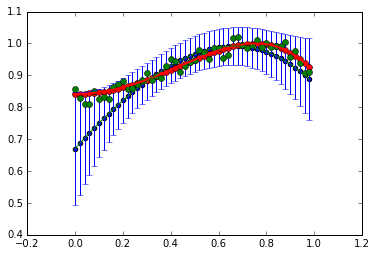

Iter: 15


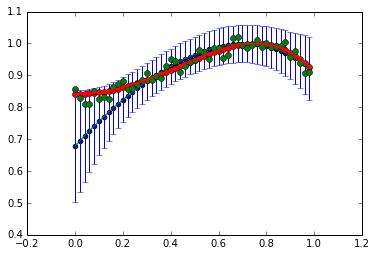

Iter: 16


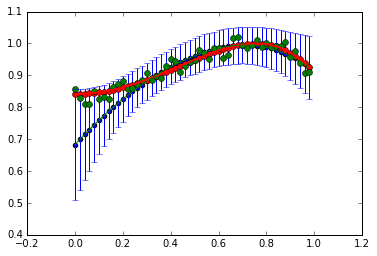

Iter: 17


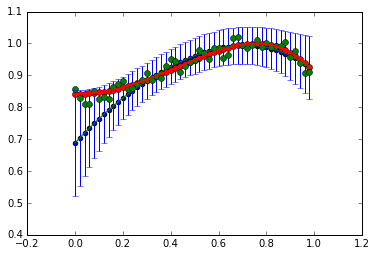

Iter: 18


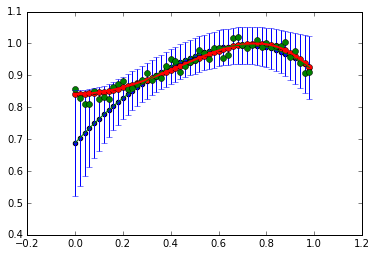

Iter: 19


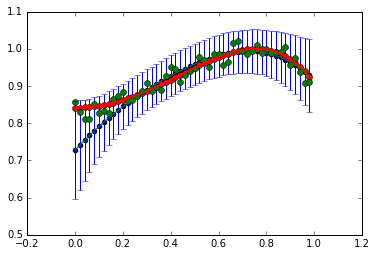

Iter: 20


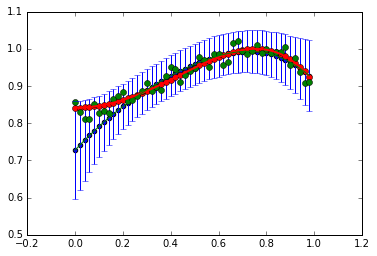

Iter: 21


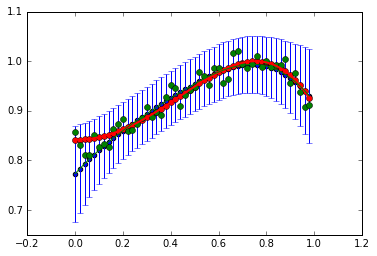

Iter: 22


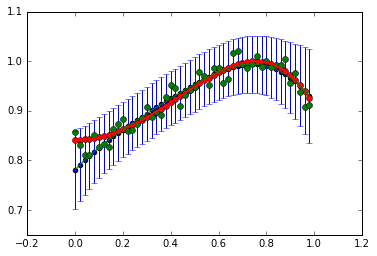

Iter: 23


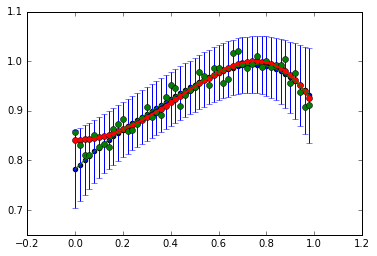

Iter: 24


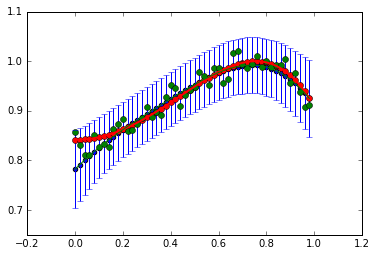

Iter: 25


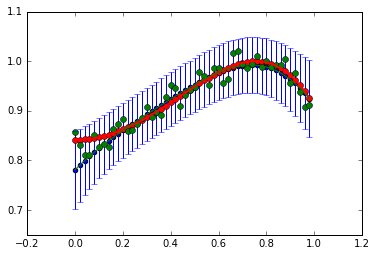

Iter: 26


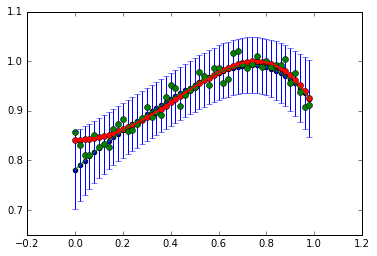

Iter: 27


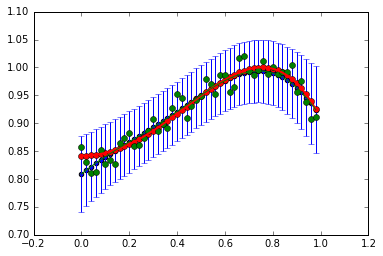

Iter: 28


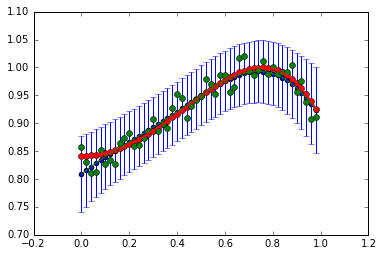

Iter: 29


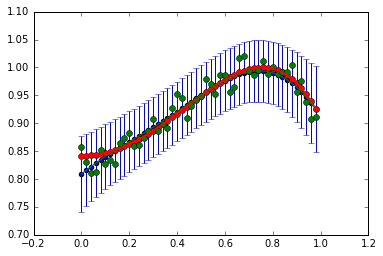

Iter: 30


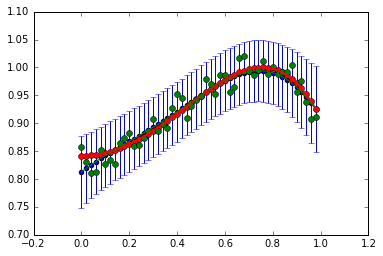

Iter: 31


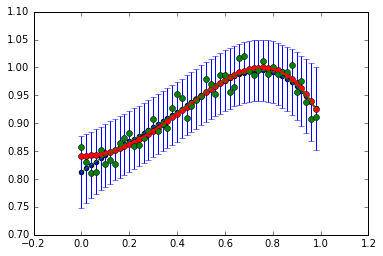

Iter: 32


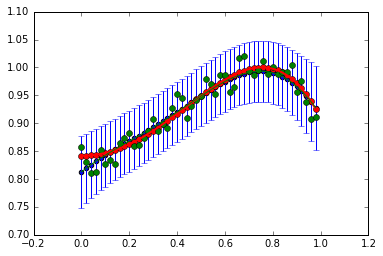

Iter: 33


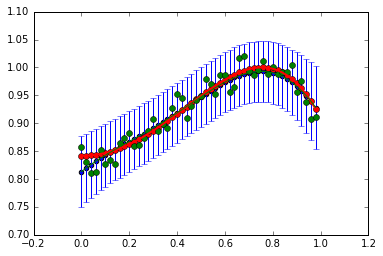

Iter: 34


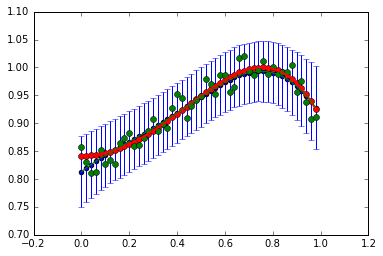

Iter: 35


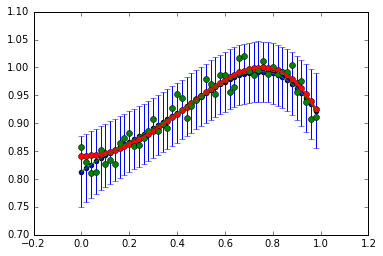

Iter: 36


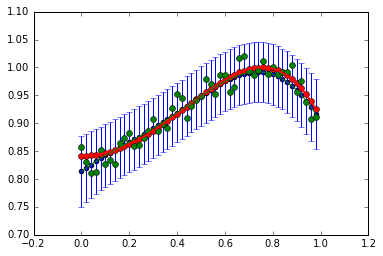

Iter: 37


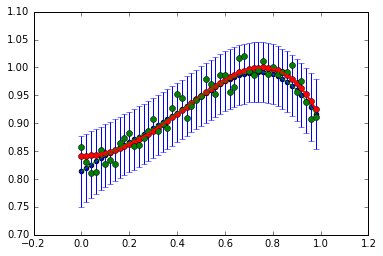

Iter: 38


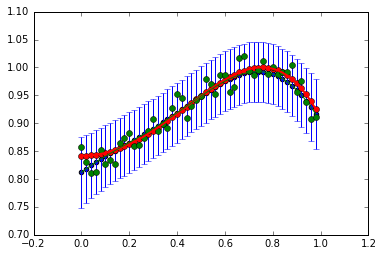

Iter: 39


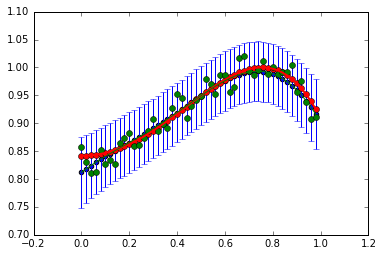

Iter: 40


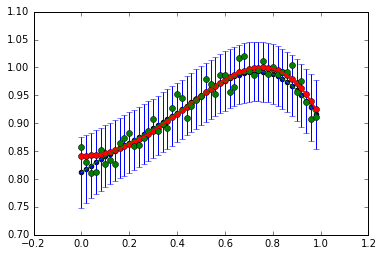

Iter: 41


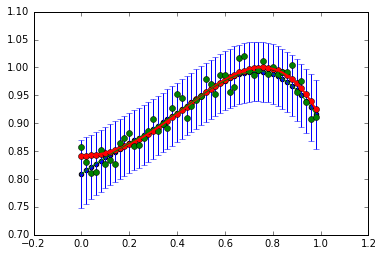

Iter: 42


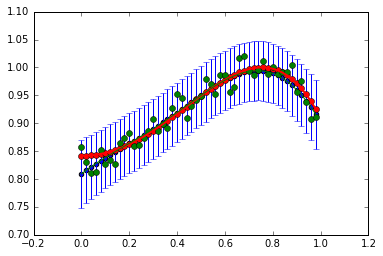

Iter: 43


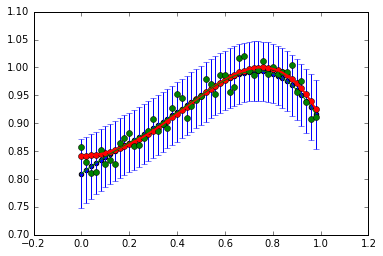

Iter: 44


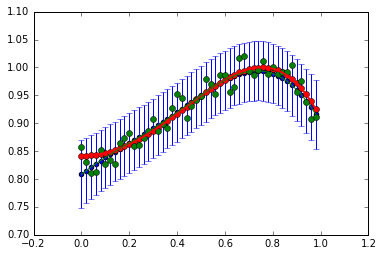

Iter: 45


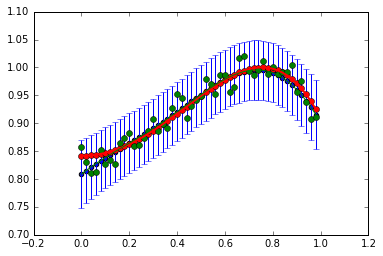

Iter: 46


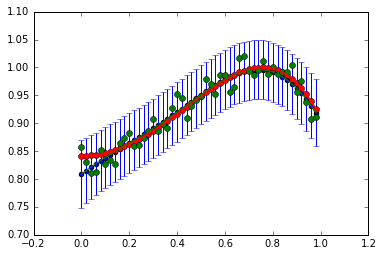

Iter: 47


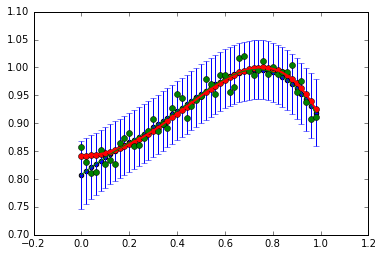

Iter: 48


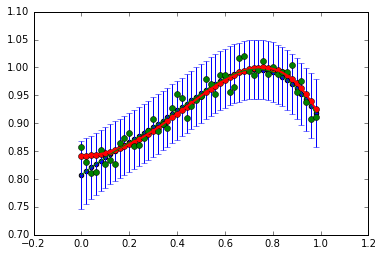

Iter: 49


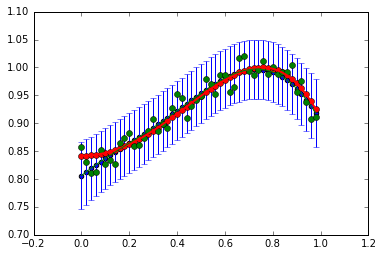

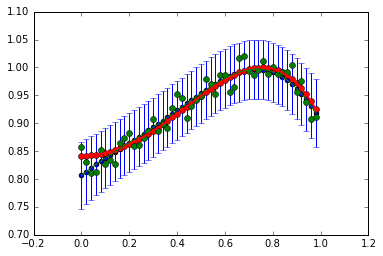

In [49]:
plot_graphs(1e-4, 20, x, y, gauss_y, 5, kernel)

## 6. Experiment with your code by changing beta, and explain what beta is for and how it affects the results.

Beta represents how confident you are with your model.
A lower beta means that you are less confident with your model.
Since s star is directly affected by 1/beta, a lower beta will result in higher errors.
This explains the high error bars from when beta becomes too low. 

When beta is higher, you are more confident with your result. 
This explains the low error bars when beta becomes very high. 

However, beta also affects all your m* and s* so that is why a higher beta will also skew some of the points. 

Having to choose a beta which does curve fitting the best though, reeks of model selection.

## 8. Change the kernel's parameters, thetas: (1.0, 64.0, 10.0, 5.0), and show the results.

Iter: 0
Iter: 1


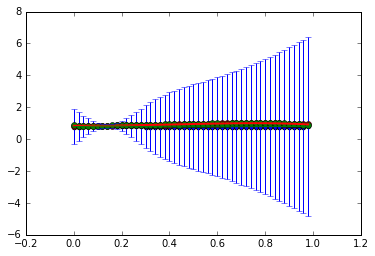

Iter: 2


Iter: 3


Iter: 4


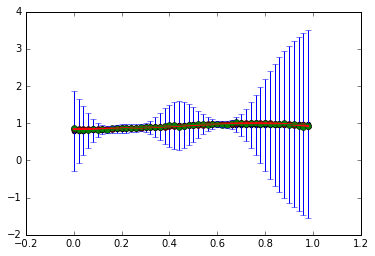

Iter: 5


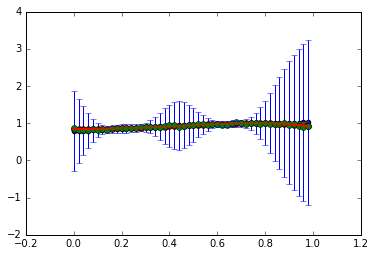

Iter: 6


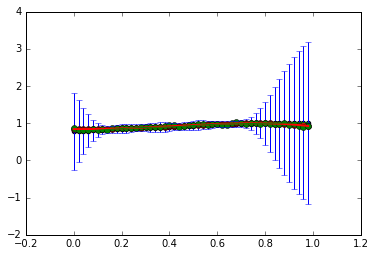

Iter: 7


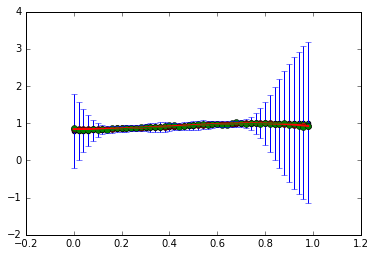

Iter: 8


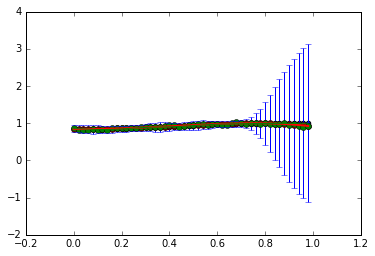

Iter: 9


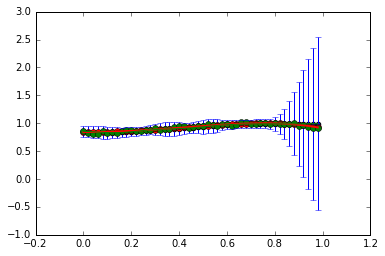

Iter: 10


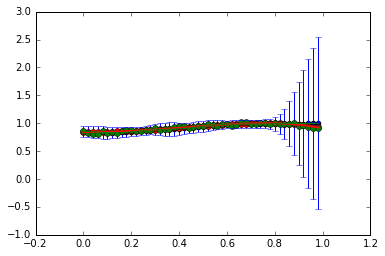

Iter: 11


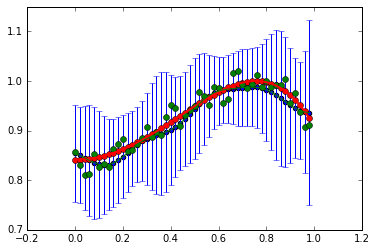

Iter: 12


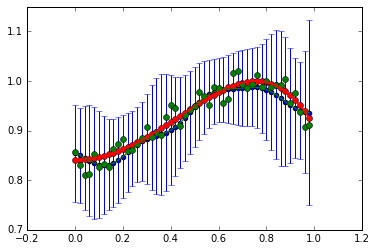

Iter: 13


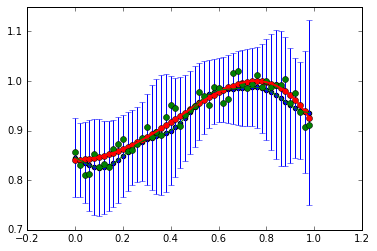

Iter: 14


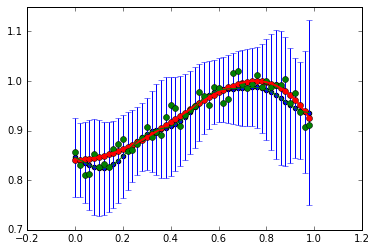

Iter: 15


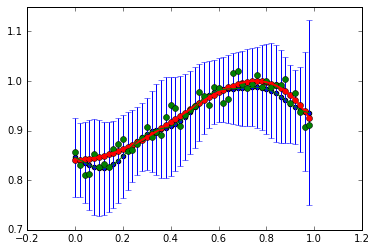

Iter: 16


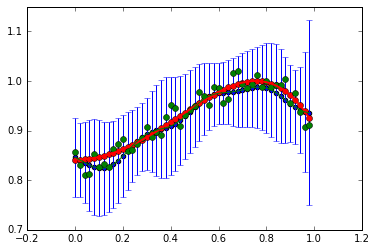

Iter: 17


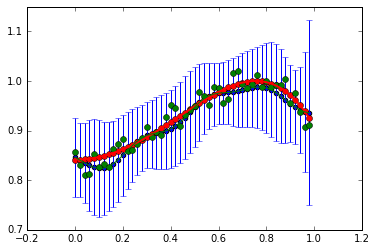

Iter: 18


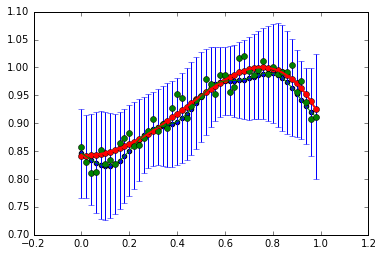

Iter: 19


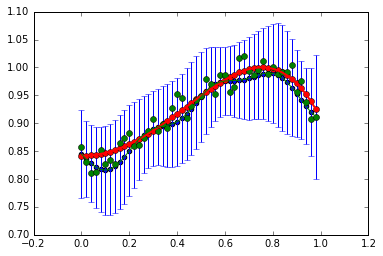

Iter: 20


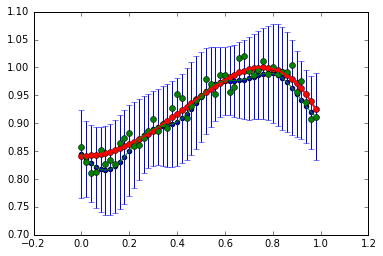

Iter: 21


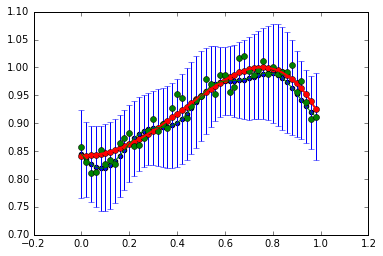

Iter: 22


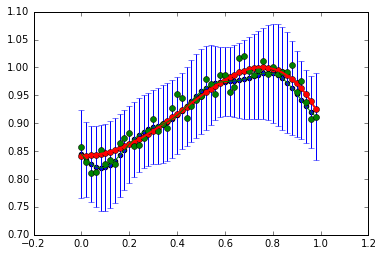

Iter: 23


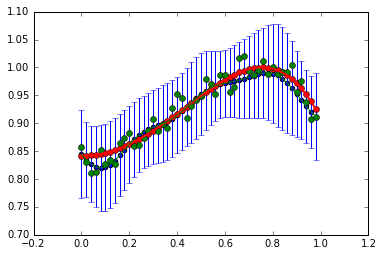

Iter: 24


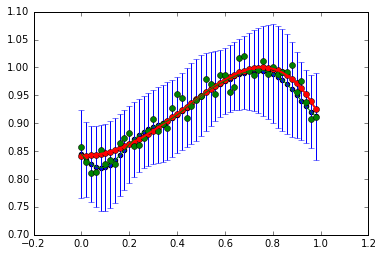

Iter: 25


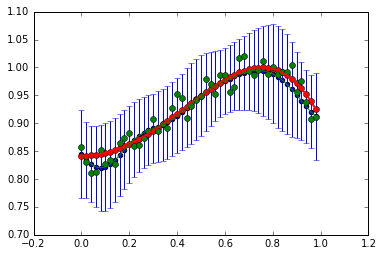

Iter: 26


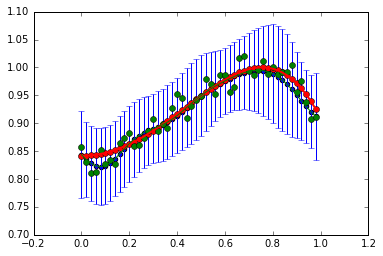

Iter: 27


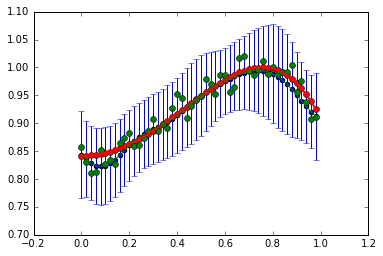

Iter: 28


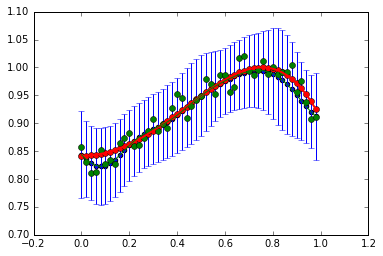

Iter: 29


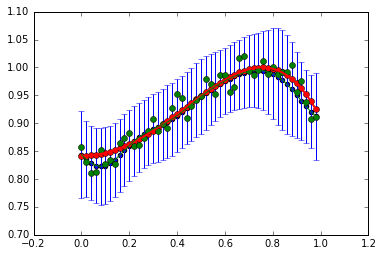

Iter: 30


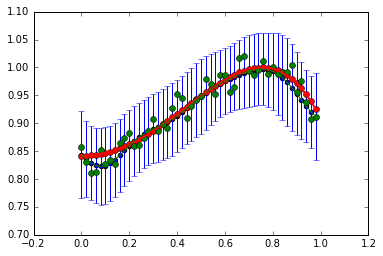

Iter: 31


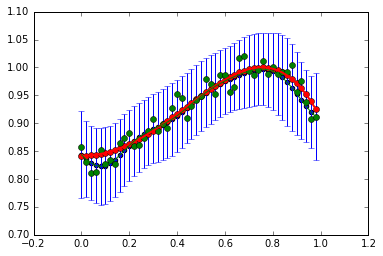

Iter: 32


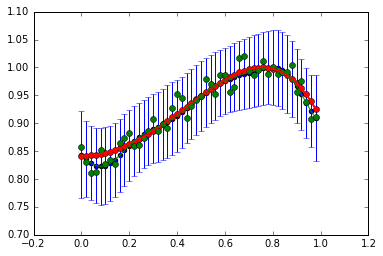

Iter: 33


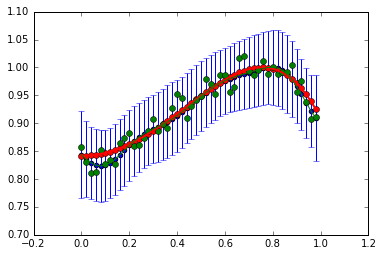

Iter: 34


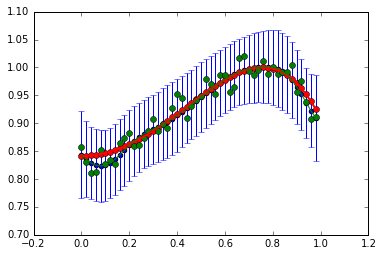

Iter: 35


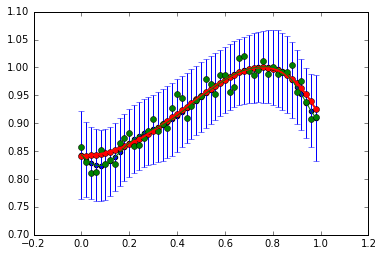

Iter: 36


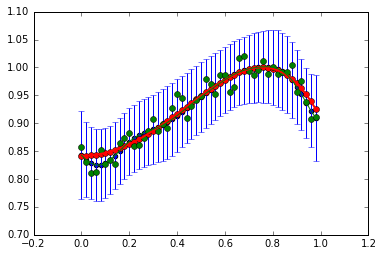

Iter: 37


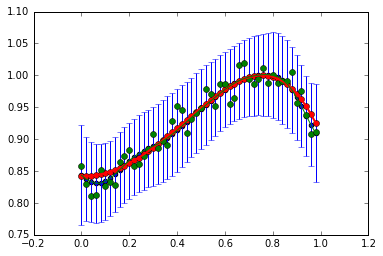

Iter: 38


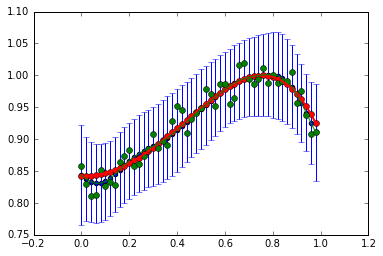

Iter: 39


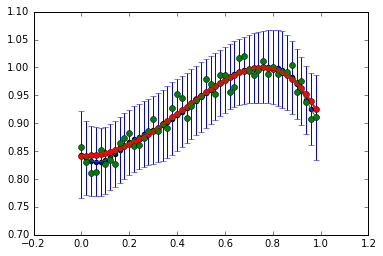

Iter: 40


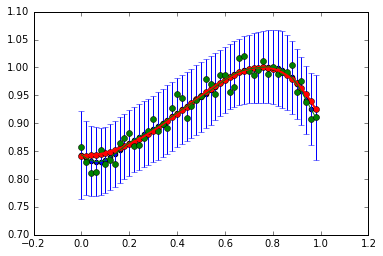

Iter: 41


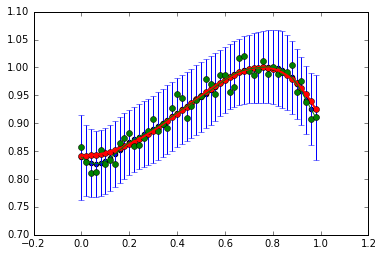

Iter: 42


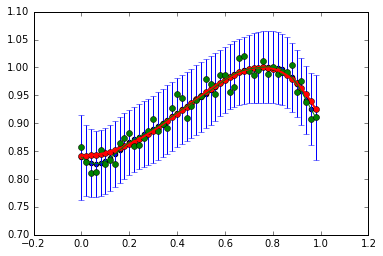

Iter: 43


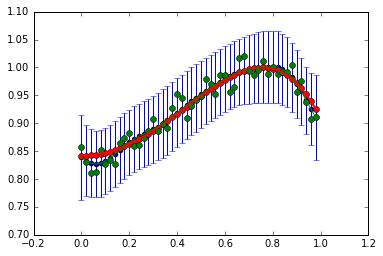

Iter: 44


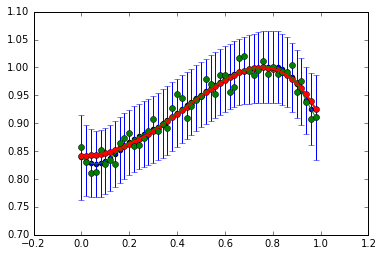

Iter: 45


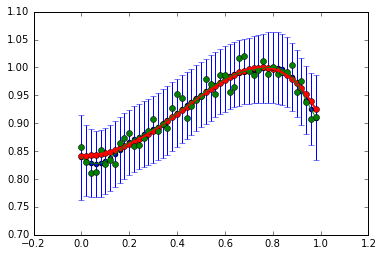

Iter: 46


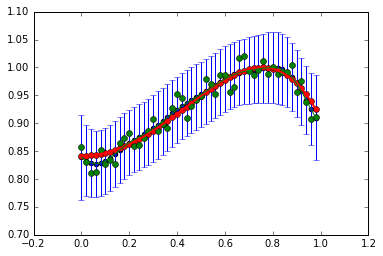

Iter: 47


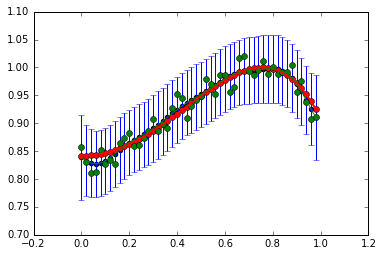

Iter: 48


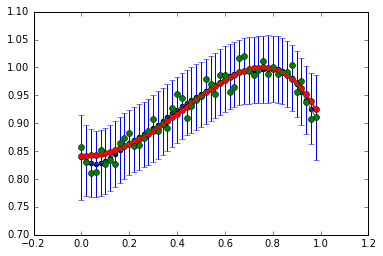

Iter: 49


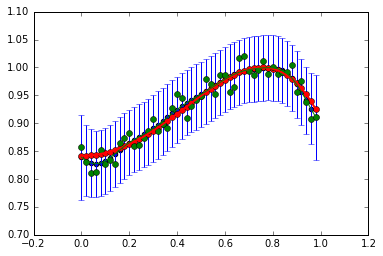

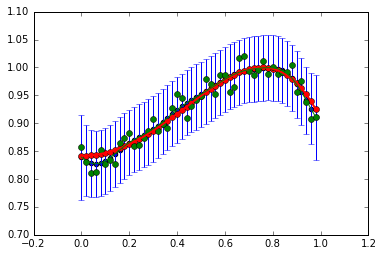

In [39]:
kernel = Kernel(1.0, 64.0, 10.0, 5.0)
plot_graphs(1e-4, 20.0, x, y, gauss_y, 5, kernel)

## 9. Explain what the effects of changing to this kernel on the prediction.

Changing the kernel leads to overfitting.

## 10. Change the kernel's parameters, thetas: (1.0, 0.25, 0.0, 0.0), and show the results.

Iter: 0
Iter: 1


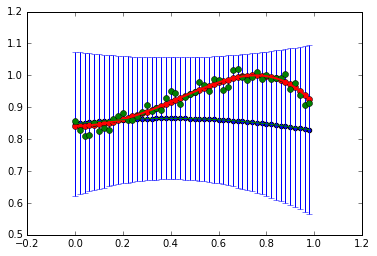

Iter: 2


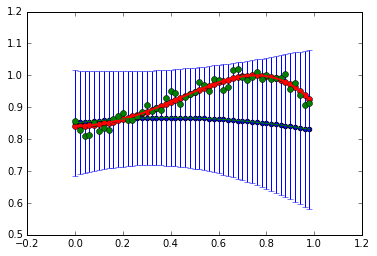

Iter: 3


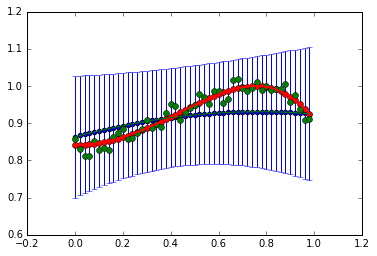

Iter: 4


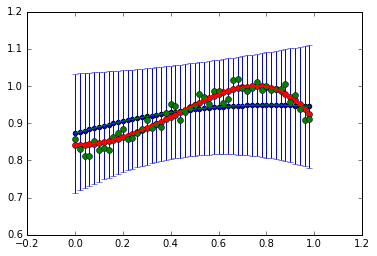

Iter: 5


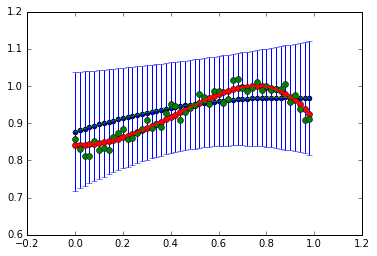

Iter: 6


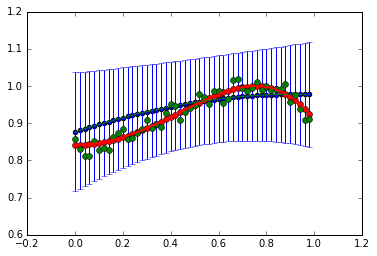

Iter: 7


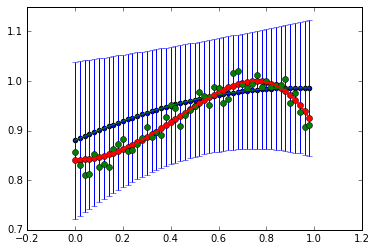

Iter: 8


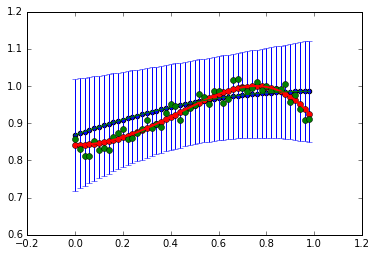

Iter: 9


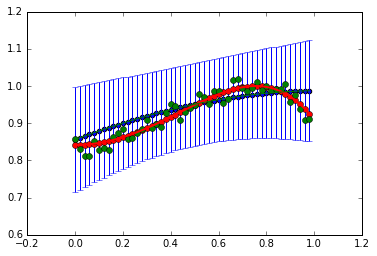

Iter: 10


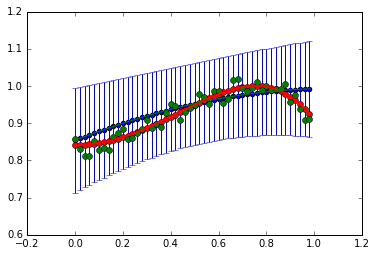

Iter: 11


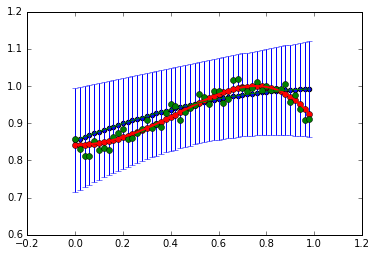

Iter: 12


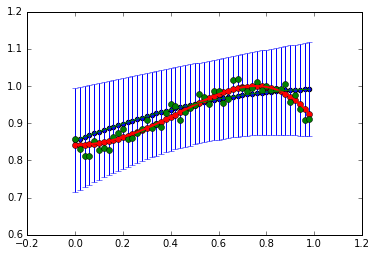

Iter: 13


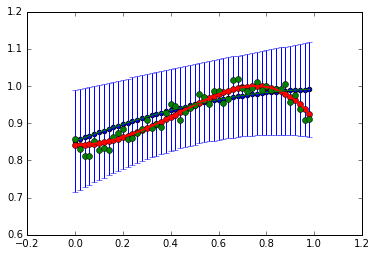

Iter: 14


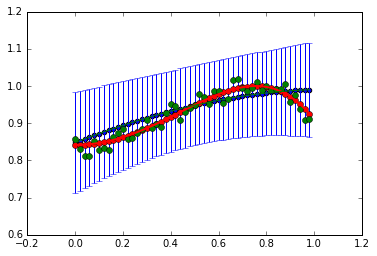

Iter: 15


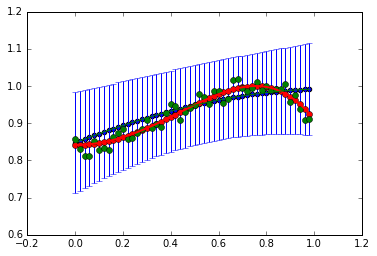

Iter: 16


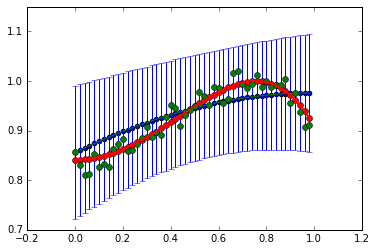

Iter: 17


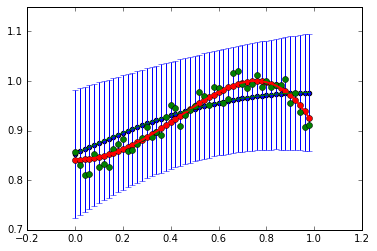

Iter: 18


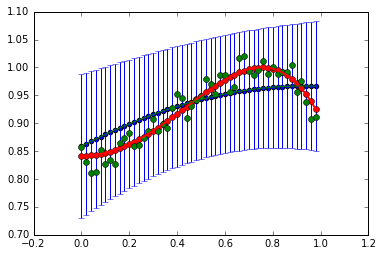

Iter: 19


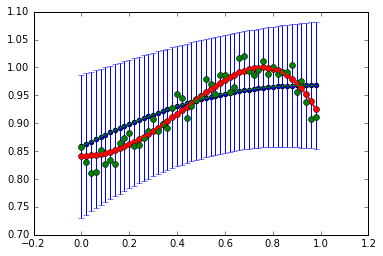

Iter: 20


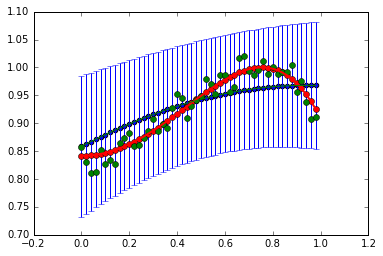

Iter: 21


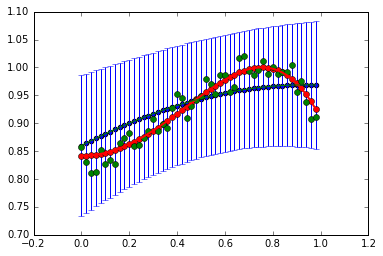

Iter: 22


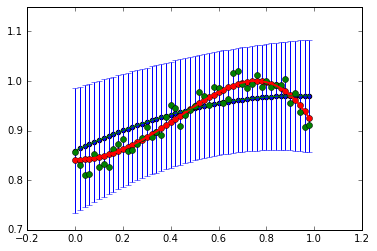

Iter: 23


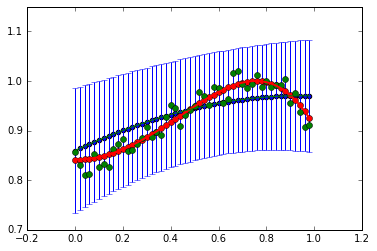

Iter: 24


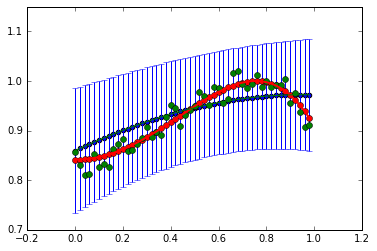

Iter: 25


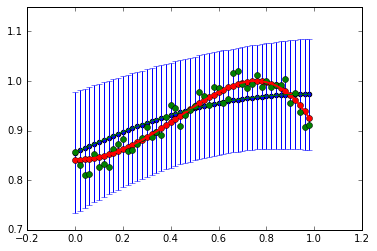

Iter: 26


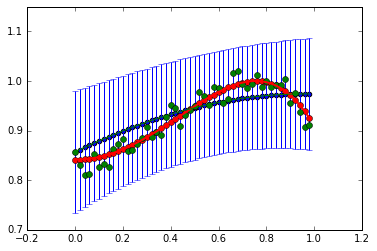

Iter: 27


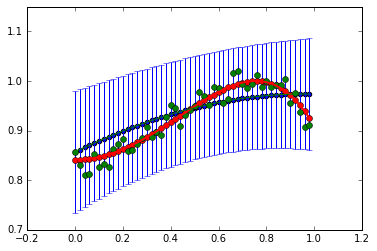

Iter: 28


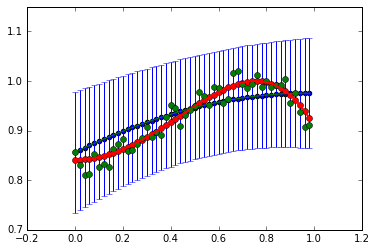

Iter: 29


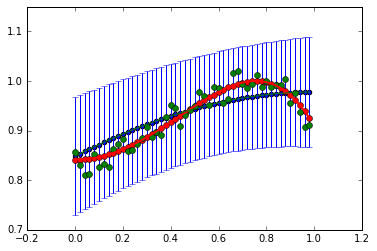

Iter: 30


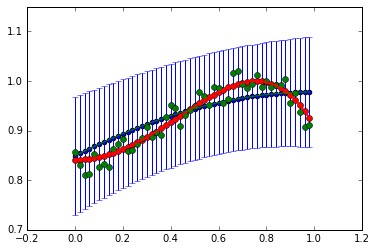

Iter: 31


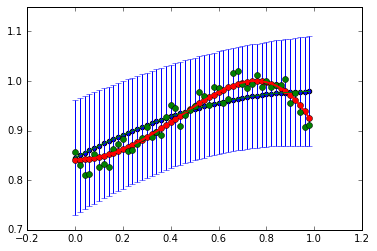

Iter: 32


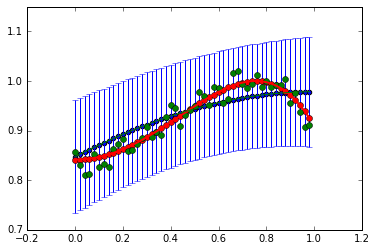

Iter: 33


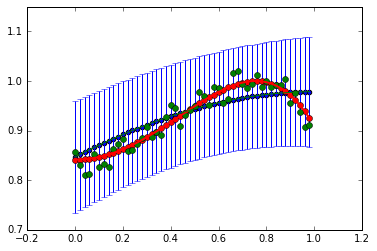

Iter: 34


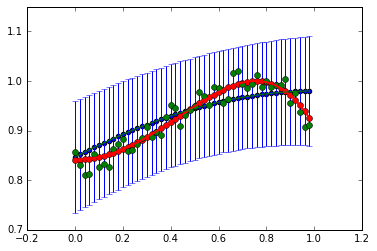

Iter: 35


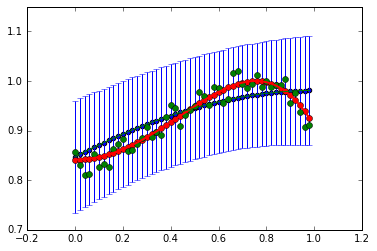

Iter: 36


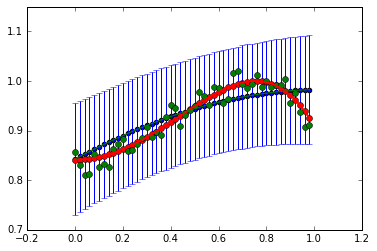

Iter: 37


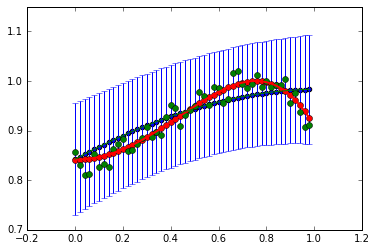

Iter: 38


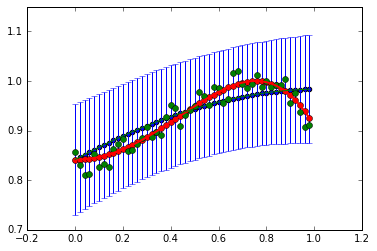

Iter: 39


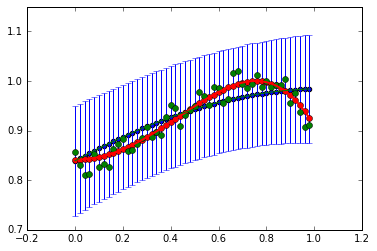

Iter: 40


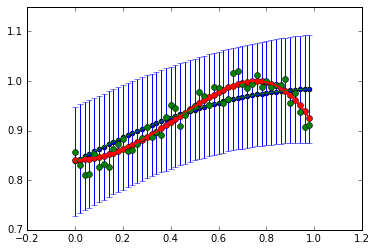

Iter: 41


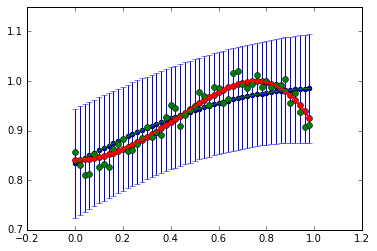

Iter: 42


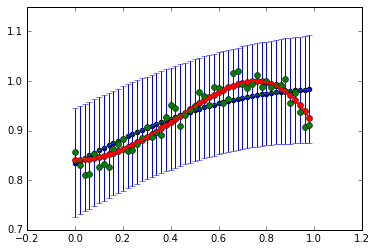

Iter: 43


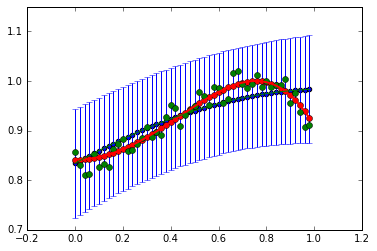

Iter: 44


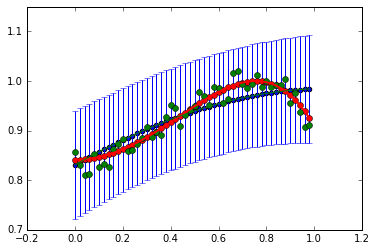

Iter: 45


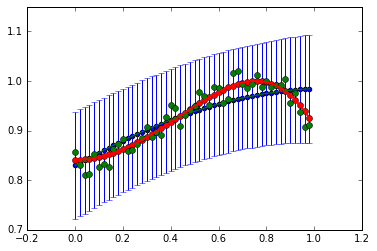

Iter: 46


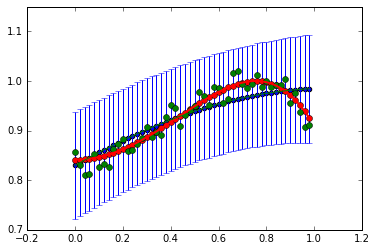

Iter: 47


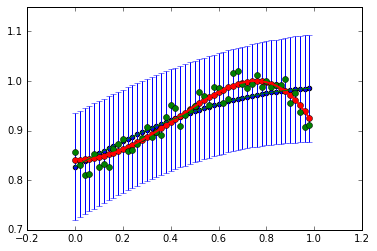

Iter: 48


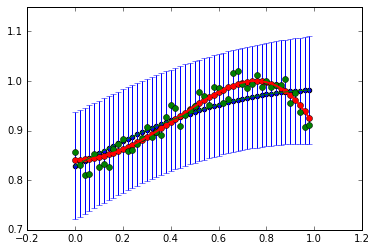

Iter: 49


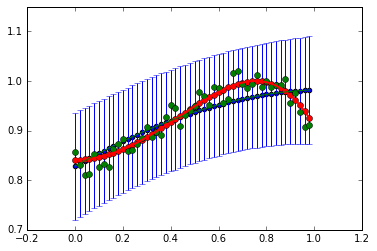

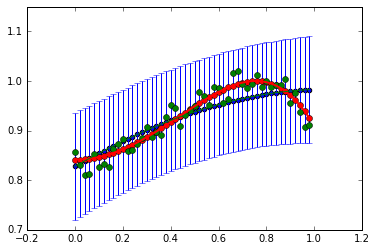

In [35]:
kernel = Kernel(1.0, 0.25, 0.0, 0.0)
plot_graphs(1e-4, 10.0, x, y, gauss_y, 5, kernel)

## 11. Explain what the effects of changing to this kernel on the prediction.

Changing to this kernel leads to underfitting